<div style = "text-align:center;">
    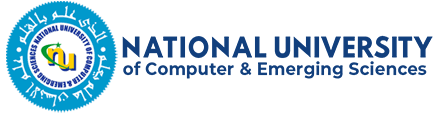
</div>

<h1 style = "text-align:center; color:#2c3e50; font-size:40px; font-weight:bold; margin-bottom:20px;">Automatic Essay Evaluation</h1>

<h2 style = "text-align:center; color:#34495e; font-size:30px; margin-top:30px;">Knowledge Representation And Reasoning</h2>

<h2 style = "text-align:center; color:#34495e; font-size:30px; margin-top:30px;">Dr. Muhammad Rafi</h2>

<h1 style = "text-align:center; color:#2c3e50; font-size:40px; margin-bottom:20px;">Group Members</h1>

<table style = "width:80%; margin:0 auto; border-collapse:collapse; box-shadow:0 4px 8px rgba(0, 0, 0, 0.1); background-color:#fff; border-radius:8px; overflow:hidden;">
    <thead>
        <tr style = "background-color:#3498db; color:white; font-weight:bold; font-size:28px">
            <th style = "border:1px solid #ddd; padding:12px; text-align:center;">Name</th>
            <th style = "border:1px solid #ddd; padding:12px; text-align:center;">Roll Number</th>
            <th style = "border:1px solid #ddd; padding:12px; text-align:center;">Section</th>
        </tr>
    </thead>
    <tbody>
        <tr style = "background-color:#f9f9f9; font-size:18px">
            <td style = "border:1px solid #ddd; padding:12px; text-align:center;">Mudasir</td>
            <td style = "border:1px solid #ddd; padding:12px; text-align:center;">22K - 8732</td>
            <td style = "border:1px solid #ddd; padding:12px; text-align:center;">BAI - 5A</td>
        </tr>
        <tr style = "background-color:#f2f2f2; font-size:18px">
            <td style = "border:1px solid #ddd; padding:12px; text-align:center;">Nihal Ali</td>
            <td style = "border:1px solid #ddd; padding:12px; text-align:center;">22K - 4054</td>
            <td style = "border:1px solid #ddd; padding:12px; text-align:center;">BAI - 5A</td>
        </tr>
        <tr style = "background-color:#f9f9f9; font-size:18px">
            <td style = "border:1px solid #ddd; padding:12px; text-align:center;">Maisum Abbas</td>
            <td style = "border:1px solid #ddd; padding:12px; text-align:center;">22K - 4129</td>
            <td style = "border:1px solid #ddd; padding:12px; text-align:center;">BAI - 5A</td>
        </tr>
    </tbody>
</table>


<h1 style = "color:#2c3e50; font-size:30px; font-weight:bold; margin-bottom:20px;">0. Imports</h1>

In [3]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Natural Language Processing (NLP)
import nltk
from nltk.tokenize import sent_tokenize
import spacy
from spellchecker import SpellChecker

# Text vectorization and similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# RDF graph processing
from rdflib import Graph, Namespace

# Regular expressions
import re

<h1 style = "color:#2c3e50; font-size:30px; font-weight:bold; margin-bottom:20px;">1. Dataset Preparation</h1>

In [2]:
df = pd.read_csv("Essays.csv", sep = ",", quoting = 1, quotechar = '"', engine = "python", encoding = "latin1", on_bad_lines = "skip")

display(df)

,essay,score,evaluation
0,[CLS] Question: Convince a local newspaper rea...,0.67,Bad
1,[CLS] Question: Convince a local newspaper rea...,0.75,Good
2,[CLS] Question: Convince a local newspaper rea...,0.58,Bad
3,[CLS] Question: Convince a local newspaper rea...,0.83,Good
4,[CLS] Question: Convince a local newspaper rea...,0.67,Bad
...,...,...,...
1778,[CLS] Question: Convince a local newspaper rea...,0.67,Bad
1779,[CLS] Question: Convince a local newspaper rea...,0.58,Bad
1780,[CLS] Question: Convince a local newspaper rea...,0.67,Bad
1781,NaN,0.17,Bad


In [3]:
df["essay"] = df["essay"].str.replace(
    "[CLS] Question: Convince a local newspaper reader on how people are affected by computers. [SEP] Student answer:  ",
    "",
    regex = False
)

df.dropna(inplace = True)

display(df)

,essay,score,evaluation
0,"Dear local newspaper, I think effects computer...",0.67,Bad
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",0.75,Good
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",0.58,Bad
3,"Dear Local Newspaper, @CAPS1 I have found that...",0.83,Good
4,"Dear @LOCATION1, I know having computers has a...",0.67,Bad
...,...,...,...
1776,Mom!!! Did you know that the human body has on...,0.83,Good
1777,"Dear @ORGANIZATION1, I believe that computers ...",0.67,Bad
1778,"Dear @CAPS1, @CAPS2 several reasons on way I t...",0.67,Bad
1779,Do a adults and kids spend to much time on the...,0.58,Bad


<h1 style = "color:#2c3e50; font-size:30px; font-weight:bold; margin-bottom:20px;">2. Making Ontology</h1>

In [4]:
ontology_df = df.copy()

ontology_df["essay"] = [f"essay{i+1} {row}" for i, row in enumerate(ontology_df["essay"])]

ontology_df.drop(columns = ["score", "evaluation"], inplace = True)

display(ontology_df)

with open("Essays.txt", "w", encoding = "utf-8") as f:
    for line in ontology_df["essay"]:
        f.write(line + "\n")

,essay
0,"essay1 Dear local newspaper, I think effects c..."
1,"essay2 Dear @CAPS1 @CAPS2, I believe that usin..."
2,"essay3 Dear, @CAPS1 @CAPS2 @CAPS3 More and mor..."
3,"essay4 Dear Local Newspaper, @CAPS1 I have fou..."
4,"essay5 Dear @LOCATION1, I know having computer..."
...,...
1776,essay1777 Mom!!! Did you know that the human b...
1777,"essay1778 Dear @ORGANIZATION1, I believe that ..."
1778,"essay1779 Dear @CAPS1, @CAPS2 several reasons ..."
1779,essay1780 Do a adults and kids spend to much t...


In [4]:
g = Graph()
g.parse("Essay_Ontology.rdf")

PTOP = Namespace("http://proton.semanticweb.org/2005/04/protont#")
PSYS = Namespace("http://proton.semanticweb.org/2005/04/protons#")
JSIKM = Namespace("http://kt.ijs.si/blazf/jsikm#")

concepts = []

for s, p, o in g.triples((None, PSYS.description, None)):
    topic = str(s)
    description = str(o)

    keywords = []
    for _, _, keywords_obj in g.triples((s, JSIKM.hasOntoGenClassProperties, None)):
        for _, _, keywords_list in g.triples((keywords_obj, JSIKM.hasCentroidKeywords, None)):
            keywords.append(str(keywords_list))

    concepts.append({"topic": topic, "description": description, "keywords": keywords})

for concept in concepts:
    print(f'Topic: {concept["topic"]}')
    print(f'Description: {concept["description"]}')
    print(f'Keywords: {", ".join(concept["keywords"])}')
    print()

Topic: http://proton.semanticweb.org/2005/04/protonkm#Cpt0_Essay
Description: Essay
Keywords: spends, learning, kids, eye, effects, reasons, hand, games, online, exercising

Topic: http://proton.semanticweb.org/2005/04/protonkm#Cpt2_GamesPlayingKids
Description: games, playing, kids
Keywords: games, playing, kids, fun, lot, online, playing_games, buy, stuff, school

Topic: http://proton.semanticweb.org/2005/04/protonkm#Cpt8_GamesPlayingKids
Description: games, playing, kids
Keywords: games, playing, kids, playing_games, fun, online, buy, dont, wasting, effects

Topic: http://proton.semanticweb.org/2005/04/protonkm#Cpt3_SpendsSpendsTimeExercising
Description: spends, spends_time, exercising
Keywords: spends, spends_time, exercising, addict, natures, kids, bad, time, time_computers, family

Topic: http://proton.semanticweb.org/2005/04/protonkm#Cpt4_CommunityInformationInternet
Description: community, information, internet
Keywords: community, information, internet, learning, great, socie

In [5]:
concepts_list = []

for concept in concepts:
    keywords_string = concept["keywords"][0]

    list_keywords = keywords_string.split(", ")

    concepts_list.extend(list_keywords)

concepts_list = list(set(concepts_list))

print("Concepts Extracted From Ontology : ", concepts_list)

Concepts Extracted From Ontology :  ['effects', 'topic', 'exercising', 'entertainment', 'obesity', 'health', 'great', 'hand', '@organization1', 'computers_good', 'community', 'lot_thing', 'information', 'reasons', 'screen', 'problems', 'work', 'computers_benefit_society', 'advances', 'place', 'fun', 'research', 'time_computers', 'musics', 'people_spends_time', 'jobs', 'playing', 'computers_benefit', 'enjoying', 'wasting', 'benefit_society', 'dont', 'games', 'stores', 'school', 'learning', 'spends', 'addict', 'lot', 'natures', 'eye', 'helps', 'computers_great', 'issues', 'buy', 'online', 'countrys', 'family', 'people_spends', 'bad', 'time', 'benefit', 'websites', 'spends_time', 'spends_time_computers', 'video', 'danger', 'affects', 'children', 'find', 'stuff', 'society', 'positive', 'save', 'internet', 'kids', 'playing_games']


<h1 style = "color:#2c3e50; font-size:30px; font-weight:bold; margin-bottom:20px;">3. Preprocessing</h1>

In [7]:
def preprocess_essay(essay):
    essay = essay.lower()
    essay = re.sub(r"[^\w\s]", "", essay)
    tokens = essay.split()
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]
    return " ".join(tokens)

df["preprocessed_essay"] = df["essay"].apply(preprocess_essay)

display(df)

,essay,score,evaluation,preprocessed_essay
0,"Dear local newspaper, I think effects computer...",0.67,Bad,dear local newspaper think effects computers p...
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",0.75,Good,dear caps1 caps2 believe using computers benef...
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",0.58,Bad,dear caps1 caps2 caps3 people use computers ag...
3,"Dear Local Newspaper, @CAPS1 I have found that...",0.83,Good,dear local newspaper caps1 experts say compute...
4,"Dear @LOCATION1, I know having computers has a...",0.67,Bad,dear location1 know having computers positive ...
...,...,...,...,...
1776,Mom!!! Did you know that the human body has on...,0.83,Good,mom did know human body liver caps1 didnt did ...
1777,"Dear @ORGANIZATION1, I believe that computers ...",0.67,Bad,dear organization1 believe computers good sour...
1778,"Dear @CAPS1, @CAPS2 several reasons on way I t...",0.67,Bad,dear caps1 caps2 reasons way advances technolo...
1779,Do a adults and kids spend to much time on the...,0.58,Bad,adults kids spend time computer dont think sur...


In [8]:
def compute_similarity(essay, concepts_list):
    corpus = [" ".join(concepts_list)] + [essay]    
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(corpus)
    
    essay_vector = tfidf_matrix[-1]
    ontology_vector = tfidf_matrix[0]

    similarity = cosine_similarity(essay_vector, ontology_vector).flatten()[0]
    return similarity

df["similarity_with_ontology"] = df["preprocessed_essay"].apply(lambda x: compute_similarity(x, concepts_list))

display(df)

,essay,score,evaluation,preprocessed_essay,similarity_with_ontology
0,"Dear local newspaper, I think effects computer...",0.67,Bad,dear local newspaper think effects computers p...,0.090819
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",0.75,Good,dear caps1 caps2 believe using computers benef...,0.079747
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",0.58,Bad,dear caps1 caps2 caps3 people use computers ag...,0.099865
3,"Dear Local Newspaper, @CAPS1 I have found that...",0.83,Good,dear local newspaper caps1 experts say compute...,0.048971
4,"Dear @LOCATION1, I know having computers has a...",0.67,Bad,dear location1 know having computers positive ...,0.079487
...,...,...,...,...,...
1776,Mom!!! Did you know that the human body has on...,0.83,Good,mom did know human body liver caps1 didnt did ...,0.055516
1777,"Dear @ORGANIZATION1, I believe that computers ...",0.67,Bad,dear organization1 believe computers good sour...,0.121442
1778,"Dear @CAPS1, @CAPS2 several reasons on way I t...",0.67,Bad,dear caps1 caps2 reasons way advances technolo...,0.062890
1779,Do a adults and kids spend to much time on the...,0.58,Bad,adults kids spend time computer dont think sur...,0.086184


In [9]:
def calculate_word_count(essay):
    words = essay.split()
    return len(words)

df["word_count"] = df["preprocessed_essay"].apply(calculate_word_count)

display(df)

,essay,score,evaluation,preprocessed_essay,similarity_with_ontology,word_count
0,"Dear local newspaper, I think effects computer...",0.67,Bad,dear local newspaper think effects computers p...,0.090819,149
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",0.75,Good,dear caps1 caps2 believe using computers benef...,0.079747,187
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",0.58,Bad,dear caps1 caps2 caps3 people use computers ag...,0.099865,125
3,"Dear Local Newspaper, @CAPS1 I have found that...",0.83,Good,dear local newspaper caps1 experts say compute...,0.048971,266
4,"Dear @LOCATION1, I know having computers has a...",0.67,Bad,dear location1 know having computers positive ...,0.079487,180
...,...,...,...,...,...,...
1776,Mom!!! Did you know that the human body has on...,0.83,Good,mom did know human body liver caps1 didnt did ...,0.055516,203
1777,"Dear @ORGANIZATION1, I believe that computers ...",0.67,Bad,dear organization1 believe computers good sour...,0.121442,139
1778,"Dear @CAPS1, @CAPS2 several reasons on way I t...",0.67,Bad,dear caps1 caps2 reasons way advances technolo...,0.062890,212
1779,Do a adults and kids spend to much time on the...,0.58,Bad,adults kids spend time computer dont think sur...,0.086184,89


In [10]:
def calculate_sentence_count(essay):
    return len(sent_tokenize(essay))

df["sentence_count"] = df["essay"].apply(calculate_sentence_count)

display(df)

,essay,score,evaluation,preprocessed_essay,similarity_with_ontology,word_count,sentence_count
0,"Dear local newspaper, I think effects computer...",0.67,Bad,dear local newspaper think effects computers p...,0.090819,149,16
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",0.75,Good,dear caps1 caps2 believe using computers benef...,0.079747,187,20
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",0.58,Bad,dear caps1 caps2 caps3 people use computers ag...,0.099865,125,14
3,"Dear Local Newspaper, @CAPS1 I have found that...",0.83,Good,dear local newspaper caps1 experts say compute...,0.048971,266,27
4,"Dear @LOCATION1, I know having computers has a...",0.67,Bad,dear location1 know having computers positive ...,0.079487,180,30
...,...,...,...,...,...,...,...
1776,Mom!!! Did you know that the human body has on...,0.83,Good,mom did know human body liver caps1 didnt did ...,0.055516,203,24
1777,"Dear @ORGANIZATION1, I believe that computers ...",0.67,Bad,dear organization1 believe computers good sour...,0.121442,139,23
1778,"Dear @CAPS1, @CAPS2 several reasons on way I t...",0.67,Bad,dear caps1 caps2 reasons way advances technolo...,0.062890,212,21
1779,Do a adults and kids spend to much time on the...,0.58,Bad,adults kids spend time computer dont think sur...,0.086184,89,18


In [11]:
df["character_count"] = df["preprocessed_essay"].apply(len)

display(df)

,essay,score,evaluation,preprocessed_essay,similarity_with_ontology,word_count,sentence_count,character_count
0,"Dear local newspaper, I think effects computer...",0.67,Bad,dear local newspaper think effects computers p...,0.090819,149,16,1054
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",0.75,Good,dear caps1 caps2 believe using computers benef...,0.079747,187,20,1324
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",0.58,Bad,dear caps1 caps2 caps3 people use computers ag...,0.099865,125,14,903
3,"Dear Local Newspaper, @CAPS1 I have found that...",0.83,Good,dear local newspaper caps1 experts say compute...,0.048971,266,27,2009
4,"Dear @LOCATION1, I know having computers has a...",0.67,Bad,dear location1 know having computers positive ...,0.079487,180,30,1314
...,...,...,...,...,...,...,...,...
1776,Mom!!! Did you know that the human body has on...,0.83,Good,mom did know human body liver caps1 didnt did ...,0.055516,203,24,1338
1777,"Dear @ORGANIZATION1, I believe that computers ...",0.67,Bad,dear organization1 believe computers good sour...,0.121442,139,23,1009
1778,"Dear @CAPS1, @CAPS2 several reasons on way I t...",0.67,Bad,dear caps1 caps2 reasons way advances technolo...,0.062890,212,21,1342
1779,Do a adults and kids spend to much time on the...,0.58,Bad,adults kids spend time computer dont think sur...,0.086184,89,18,601


In [12]:
nlp = spacy.load("en_core_web_sm")

def count_pos(text):
    pos_count = {
        "NOUN": 0,
        "VERB": 0,
        "ADJ": 0,
        "ADV": 0,
        "PRON": 0,
        "DET": 0,
        "ADP": 0,
        "AUX": 0,
        "CCONJ": 0,
        "SCONJ": 0,
        "INTJ": 0,
        "PUNCT": 0,
        "SPACE": 0,
        "NUM": 0
    }
    
    doc = nlp(text)
    
    for token in doc:
        if token.pos_ in pos_count:
            pos_count[token.pos_] += 1
    
    return pos_count

df["pos_count"] = df["preprocessed_essay"].apply(count_pos)

pos_columns = ["NOUN", "VERB", "ADJ", "ADV", "PRON", "DET", "ADP", "AUX", "CCONJ", "SCONJ", "INTJ", "PUNCT", "SPACE", "NUM"]
for pos in pos_columns:
    df[pos] = df["pos_count"].apply(lambda x: x[pos])

df.drop(columns = "pos_count", inplace = True)    

display(df)

,essay,score,evaluation,preprocessed_essay,similarity_with_ontology,word_count,sentence_count,character_count,NOUN,VERB,...,PRON,DET,ADP,AUX,CCONJ,SCONJ,INTJ,PUNCT,SPACE,NUM
0,"Dear local newspaper, I think effects computer...",0.67,Bad,dear local newspaper think effects computers p...,0.090819,149,16,1054,78,34,...,3,0,1,5,0,0,0,0,0,0
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",0.75,Good,dear caps1 caps2 believe using computers benef...,0.079747,187,20,1324,101,53,...,1,0,5,3,0,0,0,0,0,1
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",0.58,Bad,dear caps1 caps2 caps3 people use computers ag...,0.099865,125,14,903,73,31,...,0,0,0,3,0,0,0,0,0,1
3,"Dear Local Newspaper, @CAPS1 I have found that...",0.83,Good,dear local newspaper caps1 experts say compute...,0.048971,266,27,2009,150,53,...,0,0,0,0,0,0,0,0,0,0
4,"Dear @LOCATION1, I know having computers has a...",0.67,Bad,dear location1 know having computers positive ...,0.079487,180,30,1314,102,42,...,0,0,0,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,Mom!!! Did you know that the human body has on...,0.83,Good,mom did know human body liver caps1 didnt did ...,0.055516,203,24,1338,107,45,...,1,0,4,9,0,0,0,0,0,0
1777,"Dear @ORGANIZATION1, I believe that computers ...",0.67,Bad,dear organization1 believe computers good sour...,0.121442,139,23,1009,79,32,...,1,0,0,3,0,0,1,0,0,0
1778,"Dear @CAPS1, @CAPS2 several reasons on way I t...",0.67,Bad,dear caps1 caps2 reasons way advances technolo...,0.062890,212,21,1342,84,62,...,7,0,5,6,0,0,2,0,0,0
1779,Do a adults and kids spend to much time on the...,0.58,Bad,adults kids spend time computer dont think sur...,0.086184,89,18,601,49,22,...,6,0,3,7,0,0,0,0,0,0


In [13]:
def count_misspelled_words(text):
    spell = SpellChecker()
    words = text.split()
    misspelled = spell.unknown(words)
    return len(misspelled)

df["misspelled_count"] = df["preprocessed_essay"].apply(count_misspelled_words)

display(df)

,essay,score,evaluation,preprocessed_essay,similarity_with_ontology,word_count,sentence_count,character_count,NOUN,VERB,...,DET,ADP,AUX,CCONJ,SCONJ,INTJ,PUNCT,SPACE,NUM,misspelled_count
0,"Dear local newspaper, I think effects computer...",0.67,Bad,dear local newspaper think effects computers p...,0.090819,149,16,1054,78,34,...,0,1,5,0,0,0,0,0,0,23
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",0.75,Good,dear caps1 caps2 believe using computers benef...,0.079747,187,20,1324,101,53,...,0,5,3,0,0,0,0,0,1,24
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",0.58,Bad,dear caps1 caps2 caps3 people use computers ag...,0.099865,125,14,903,73,31,...,0,0,3,0,0,0,0,0,1,10
3,"Dear Local Newspaper, @CAPS1 I have found that...",0.83,Good,dear local newspaper caps1 experts say compute...,0.048971,266,27,2009,150,53,...,0,0,0,0,0,0,0,0,0,46
4,"Dear @LOCATION1, I know having computers has a...",0.67,Bad,dear location1 know having computers positive ...,0.079487,180,30,1314,102,42,...,0,0,4,0,0,0,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,Mom!!! Did you know that the human body has on...,0.83,Good,mom did know human body liver caps1 didnt did ...,0.055516,203,24,1338,107,45,...,0,4,9,0,0,0,0,0,0,16
1777,"Dear @ORGANIZATION1, I believe that computers ...",0.67,Bad,dear organization1 believe computers good sour...,0.121442,139,23,1009,79,32,...,0,0,3,0,0,1,0,0,0,13
1778,"Dear @CAPS1, @CAPS2 several reasons on way I t...",0.67,Bad,dear caps1 caps2 reasons way advances technolo...,0.062890,212,21,1342,84,62,...,0,5,6,0,0,2,0,0,0,23
1779,Do a adults and kids spend to much time on the...,0.58,Bad,adults kids spend time computer dont think sur...,0.086184,89,18,601,49,22,...,0,3,7,0,0,0,0,0,0,13


In [14]:
df.to_csv("Preprocessed_Essays.csv", index = False)

<h1 style = "color:#2c3e50; font-size:30px; font-weight:bold; margin-bottom:20px;">4. Linear Regression</h1>

In [6]:
df = pd.read_csv("Preprocessed_Essays.csv")

In [7]:
numerical_columns = df.select_dtypes(include = "number")

In [8]:
display(numerical_columns)

,score,similarity_with_ontology,word_count,sentence_count,character_count,NOUN,VERB,ADJ,ADV,PRON,DET,ADP,AUX,CCONJ,SCONJ,INTJ,PUNCT,SPACE,NUM,misspelled_count
0,0.67,0.090819,149,16,1054,78,34,17,4,3,0,1,5,0,0,0,0,0,0,23
1,0.75,0.079747,187,20,1324,101,53,12,2,1,0,5,3,0,0,0,0,0,1,24
2,0.58,0.099865,125,14,903,73,31,12,2,0,0,0,3,0,0,0,0,0,1,10
3,0.83,0.048971,266,27,2009,150,53,31,8,0,0,0,0,0,0,0,0,0,0,46
4,0.67,0.079487,180,30,1314,102,42,16,11,0,0,0,4,0,0,0,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,0.83,0.055516,203,24,1338,107,45,23,13,1,0,4,9,0,0,0,0,0,0,16
1777,0.67,0.121442,139,23,1009,79,32,13,8,1,0,0,3,0,0,1,0,0,0,13
1778,0.67,0.062890,212,21,1342,84,62,19,22,7,0,5,6,0,0,2,0,0,0,23
1779,0.58,0.086184,89,18,601,49,22,7,1,6,0,3,7,0,0,0,0,0,0,13


In [9]:
X = numerical_columns["similarity_with_ontology"]
y = numerical_columns["score"]

In [10]:
display(X, y)

0       0.090819
1       0.079747
2       0.099865
3       0.048971
4       0.079487
          ...   
1776    0.055516
1777    0.121442
1778    0.062890
1779    0.086184
1780    0.060431
Name: similarity_with_ontology, Length: 1781, dtype: float64

0       0.67
1       0.75
2       0.58
3       0.83
4       0.67
        ... 
1776    0.83
1777    0.67
1778    0.67
1779    0.58
1780    0.67
Name: score, Length: 1781, dtype: float64

In [11]:
lr1 = LinearRegression()
X = X.values.reshape(-1, 1)
lr1.fit(X, y)

coefficients = pd.DataFrame({
    "Feature": "similarity_with_ontology",
    "Coefficient": lr1.coef_
})

display(coefficients)

,Feature,Coefficient
0,similarity_with_ontology,1.229882


In [12]:
X = numerical_columns.drop(columns = ["score", "character_count", "sentence_count", "similarity_with_ontology"])
y = numerical_columns["score"]

In [13]:
display(X, y)

,word_count,NOUN,VERB,ADJ,ADV,PRON,DET,ADP,AUX,CCONJ,SCONJ,INTJ,PUNCT,SPACE,NUM,misspelled_count
0,149,78,34,17,4,3,0,1,5,0,0,0,0,0,0,23
1,187,101,53,12,2,1,0,5,3,0,0,0,0,0,1,24
2,125,73,31,12,2,0,0,0,3,0,0,0,0,0,1,10
3,266,150,53,31,8,0,0,0,0,0,0,0,0,0,0,46
4,180,102,42,16,11,0,0,0,4,0,0,0,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,203,107,45,23,13,1,0,4,9,0,0,0,0,0,0,16
1777,139,79,32,13,8,1,0,0,3,0,0,1,0,0,0,13
1778,212,84,62,19,22,7,0,5,6,0,0,2,0,0,0,23
1779,89,49,22,7,1,6,0,3,7,0,0,0,0,0,0,13


0       0.67
1       0.75
2       0.58
3       0.83
4       0.67
        ... 
1776    0.83
1777    0.67
1778    0.67
1779    0.58
1780    0.67
Name: score, Length: 1781, dtype: float64

In [14]:
lr2 = LinearRegression()
lr2.fit(X, y)

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr2.coef_
}).sort_values(by = "Coefficient", ascending = False)

display(coefficients)

,Feature,Coefficient
14,NUM,5.736019e-03
9,CCONJ,4.850832e-03
6,DET,3.790185e-03
4,ADV,2.072073e-03
3,ADJ,1.799269e-03
1,NOUN,1.249002e-03
2,VERB,9.231307e-04
0,word_count,6.010558e-04
8,AUX,5.993553e-04
15,misspelled_count,4.313665e-04


<h1 style = "color:#2c3e50; font-size:30px; font-weight:bold; margin-bottom:20px;">5. Testing</h1>

In [15]:
nlp = spacy.load("en_core_web_sm")

user_essay = input("Enter your essay: ")

essay = user_essay.lower()
essay = re.sub(r"[^\w\s]", "", essay)

tokens = essay.split()
tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]
preprocessed_essay = " ".join(tokens)

corpus = [" ".join(concepts_list)] + [preprocessed_essay]
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

essay_vector = tfidf_matrix[-1]
ontology_vector = tfidf_matrix[0]

similarity_with_ontology = cosine_similarity(essay_vector, ontology_vector).flatten()[0]

word_count = len(preprocessed_essay.split())

pos_count = {
    "NOUN": 0,
    "VERB": 0,
    "ADJ": 0,
    "ADV": 0,
    "PRON": 0,
    "DET": 0,
    "ADP": 0,
    "AUX": 0,
    "CCONJ": 0,
    "SCONJ": 0,
    "INTJ": 0,
    "PUNCT": 0,
    "SPACE": 0,
    "NUM": 0
}

doc = nlp(preprocessed_essay)

for token in doc:
    if token.pos_ in pos_count:
        pos_count[token.pos_] += 1

spell = SpellChecker()
words = preprocessed_essay.split()
misspelled = spell.unknown(words)
misspelled_count = len(misspelled)

data = {
    "similarity_with_ontology": [similarity_with_ontology],
    "word_count": [word_count],
    "misspelled_count": [misspelled_count]
}

data.update(pos_count)

columns = [
    "similarity_with_ontology", "word_count", "NOUN", "VERB", "ADJ", "ADV", "PRON", 
    "DET", "ADP", "AUX", "CCONJ", "SCONJ", "INTJ", "PUNCT", "SPACE", "NUM", "misspelled_count"
]

user_df = pd.DataFrame(data, columns=columns)

display(user_df)

Enter your essay: Computers have become an integral part of society, influencing how people work, learn, and entertain themselves. Many kids and adults enjoy playing games, browsing websites, or shopping online, which brings fun and convenience. Computers also benefit society by providing easy access to information, supporting learning, and improving work efficiency. People can save time by using computers for tasks like research or shopping, making life easier and more productive.  However, spending too much time on computers can lead to problems such as eye strain, obesity, and poor posture. Kids, in particular, may get addicted to video games or online entertainment, neglecting exercise and social interaction with family and friends. While computers are great tools, it's important to manage screen time to avoid negative effects on health and relationships.  In conclusion, computers offer many benefits but can also have harmful effects if overused. Finding a balance between screen ti

,similarity_with_ontology,word_count,NOUN,VERB,ADJ,ADV,PRON,DET,ADP,AUX,CCONJ,SCONJ,INTJ,PUNCT,SPACE,NUM,misspelled_count
0,0.201921,97,55,24,14,1,0,0,1,1,0,0,0,0,0,0,0


In [18]:
if user_df["similarity_with_ontology"][0] < 0.1:
    score1 = [0]
else:
    score1 = lr1.predict([user_df["similarity_with_ontology"]])

In [19]:
score2 = lr2.predict(user_df.drop(columns = "similarity_with_ontology"))

In [20]:
print(f"Score according to similarity : {score1[0]:.2f}")
print(f"Score according to other features : {score2[0]:.2f}")

Score according to similarity : 0.88
Score according to other features : 0.60


In [21]:
total_score = (80 * score1[0]) + (20 * score2[0])

In [22]:
print(f"Total score of the essay is : {total_score:.2f}")

Total score of the essay is : 82.66


<h1 style = "color:#2c3e50; font-size:30px; font-weight:bold; margin-bottom:20px;">6. Plots</h1>

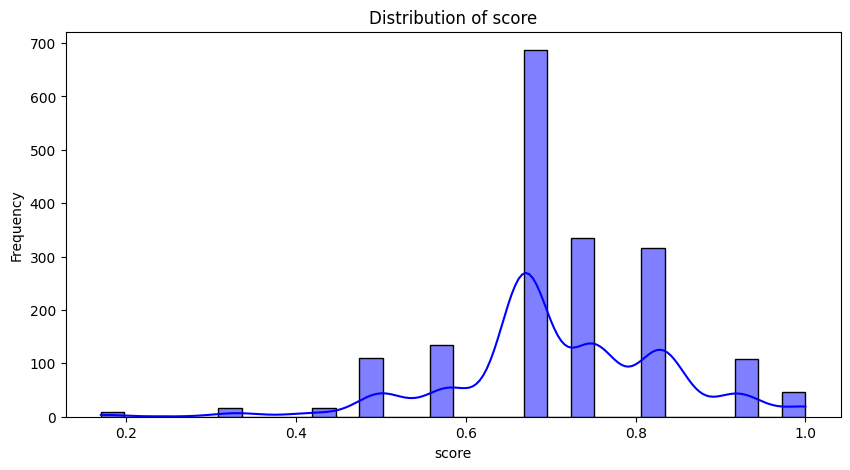

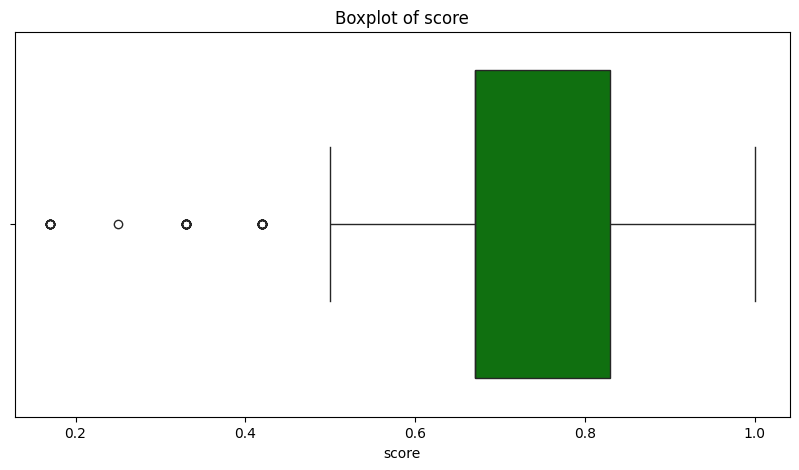

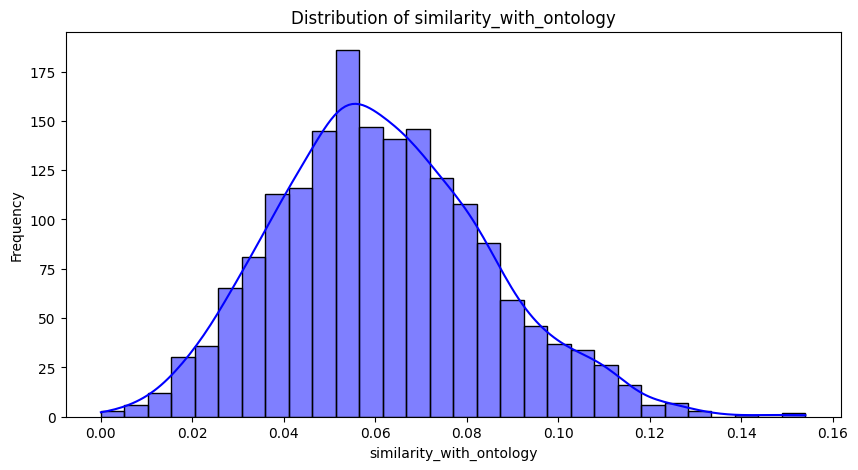

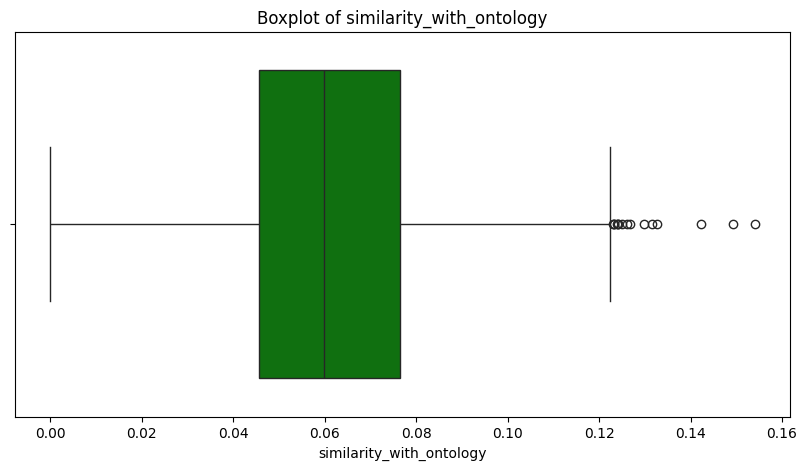

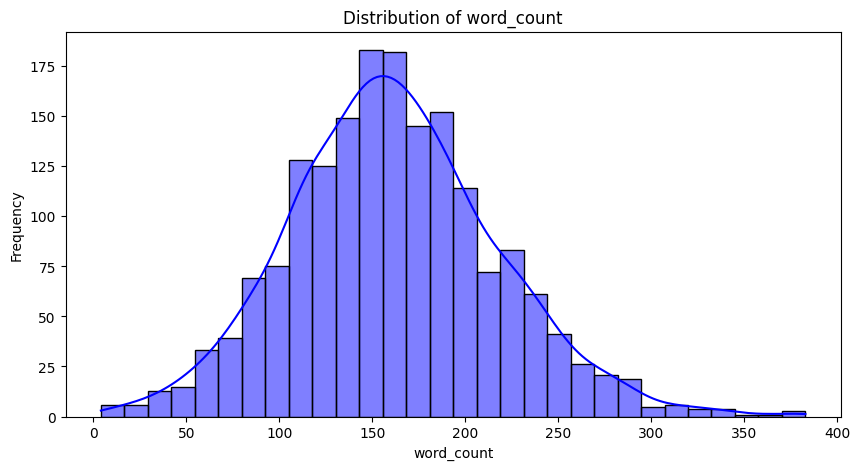

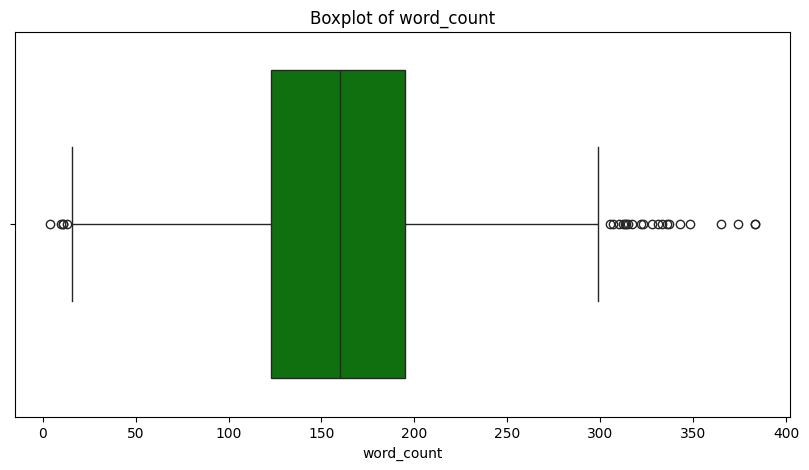

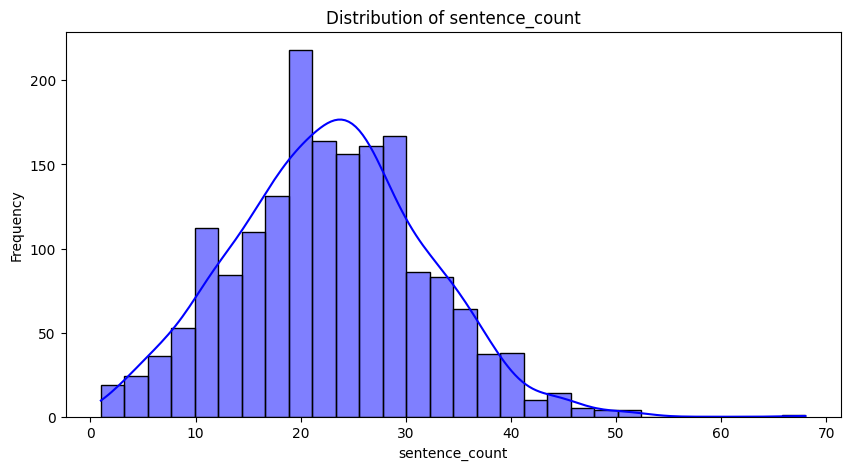

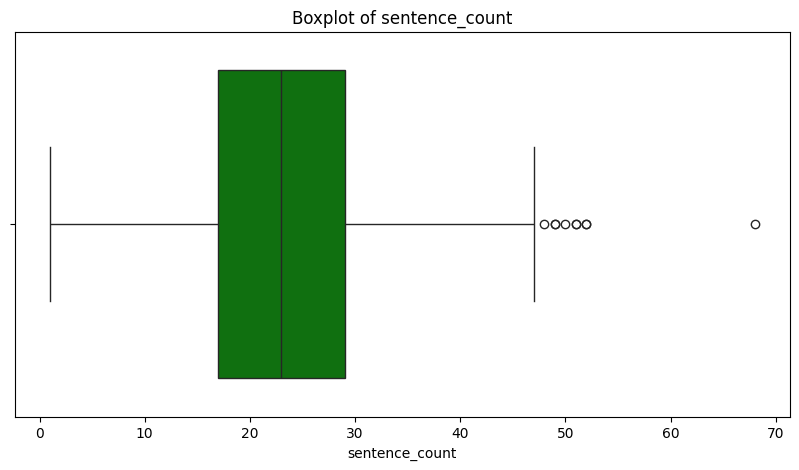

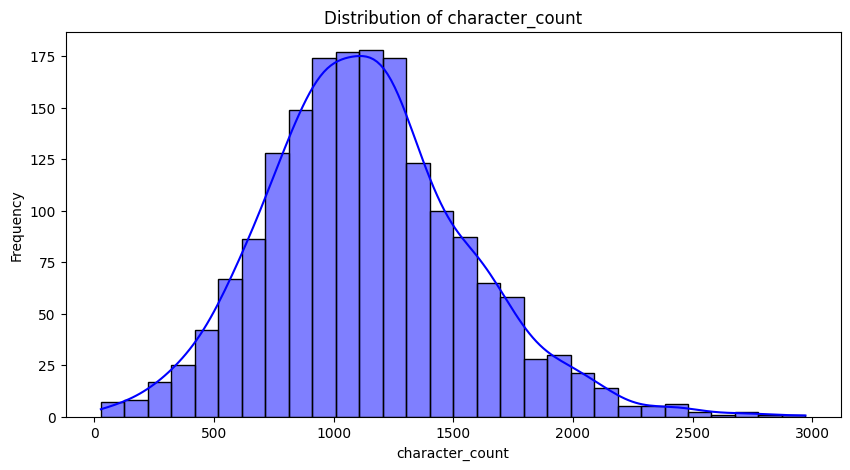

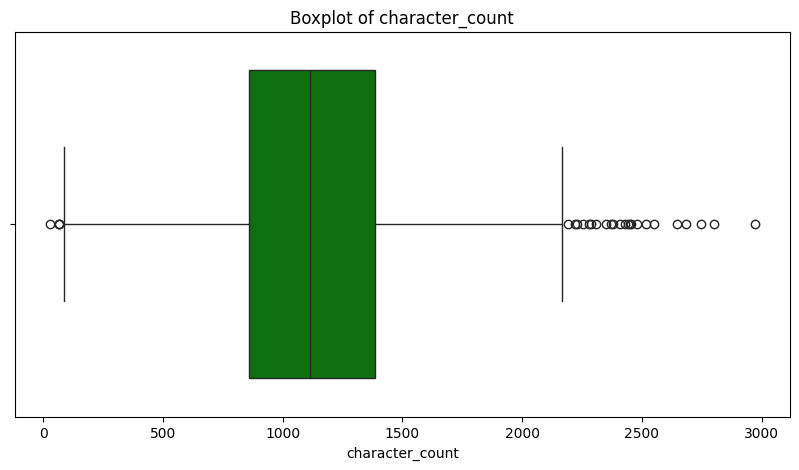

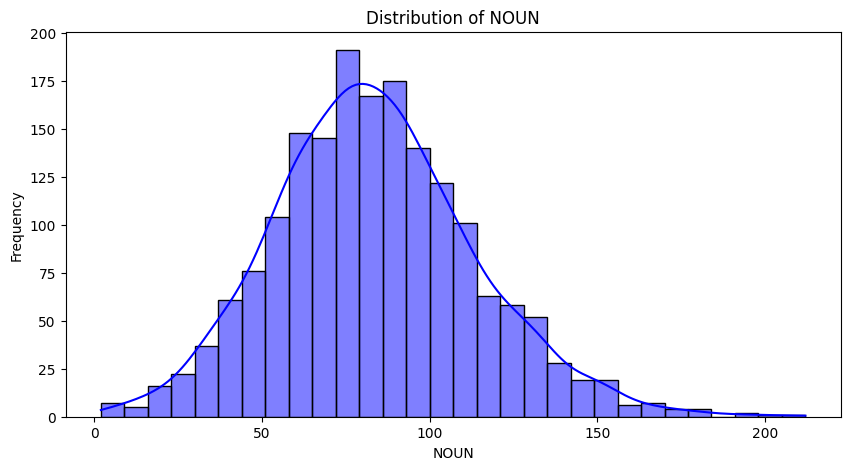

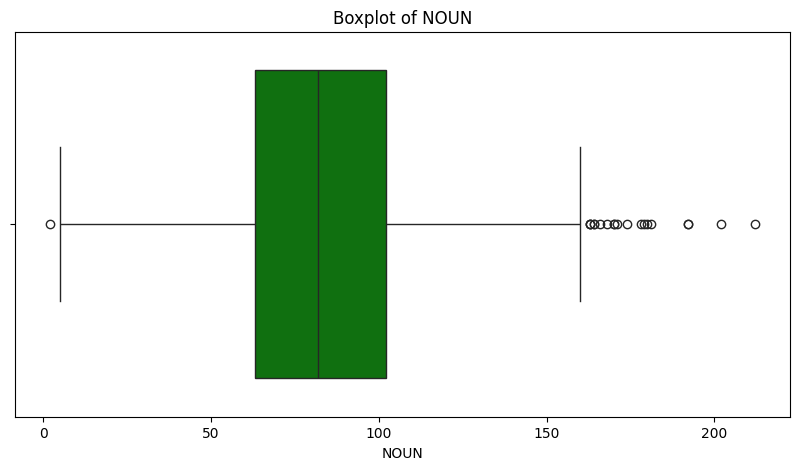

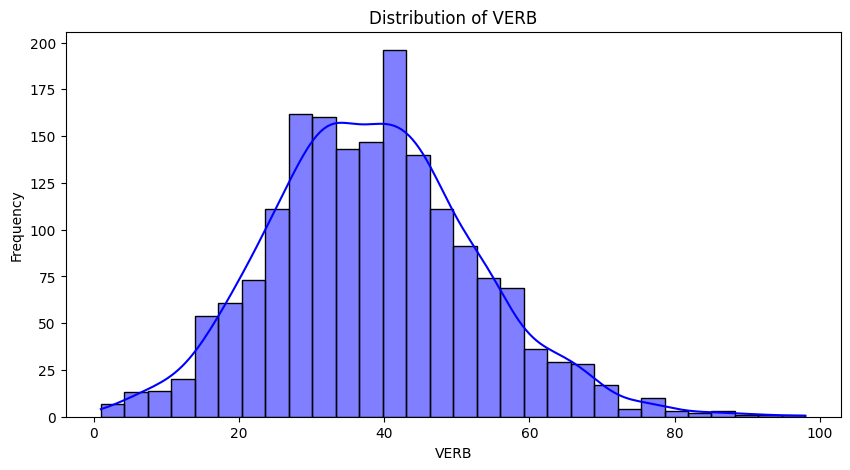

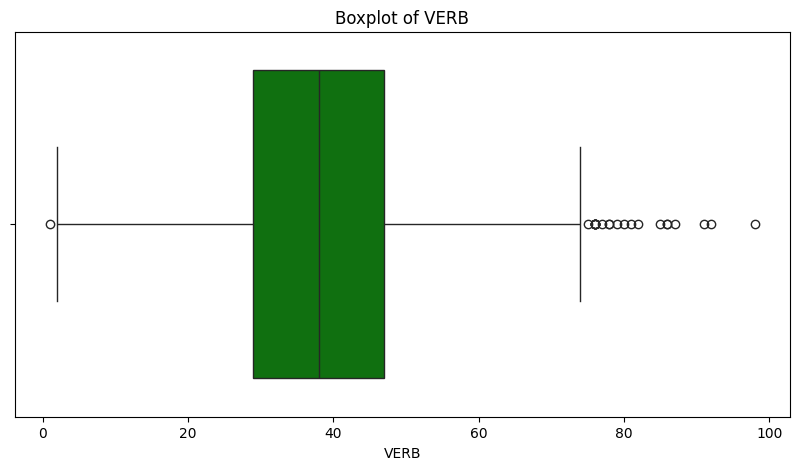

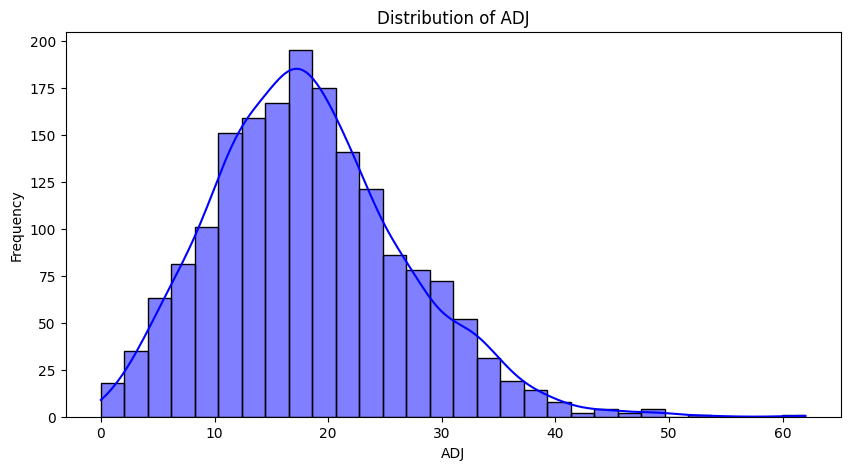

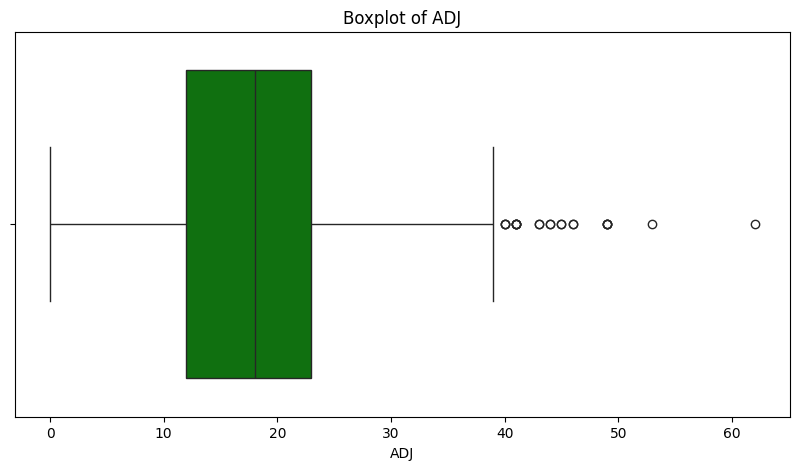

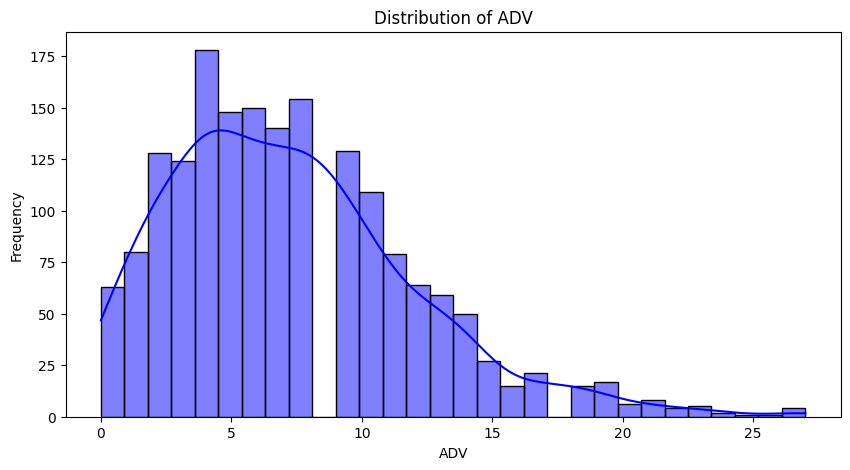

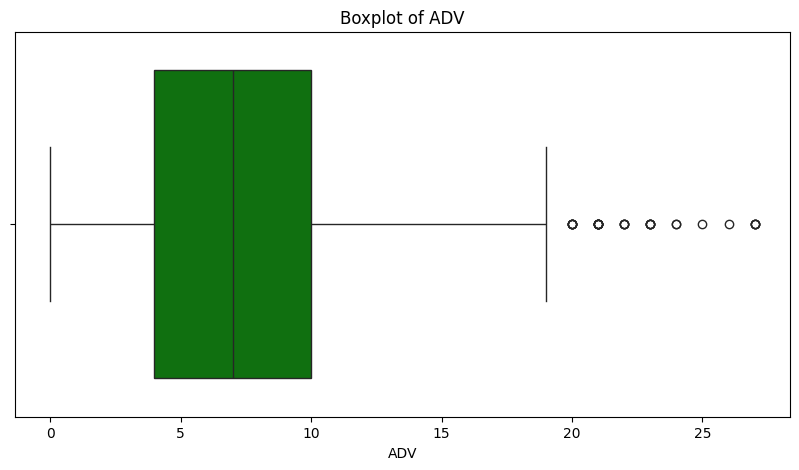

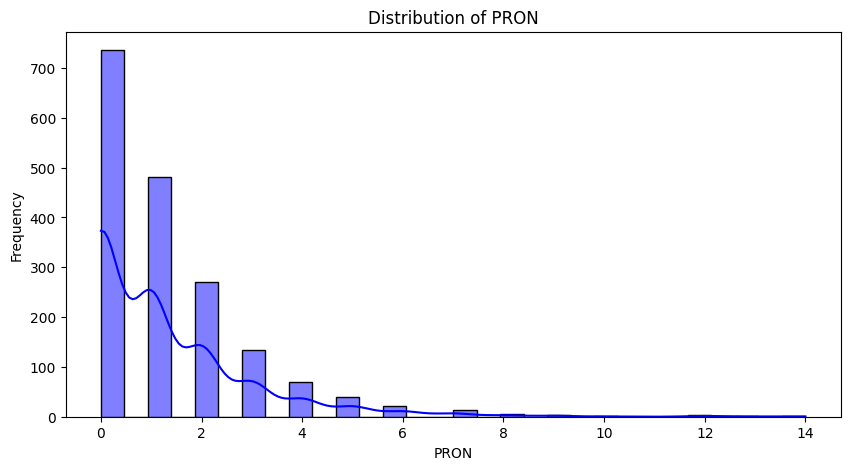

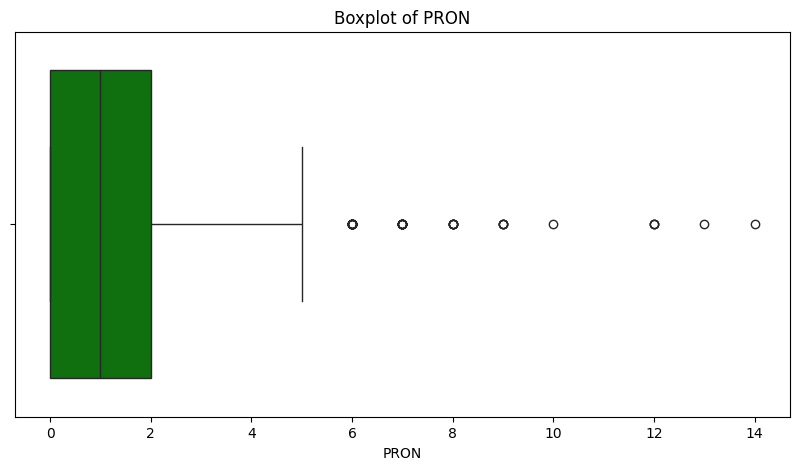

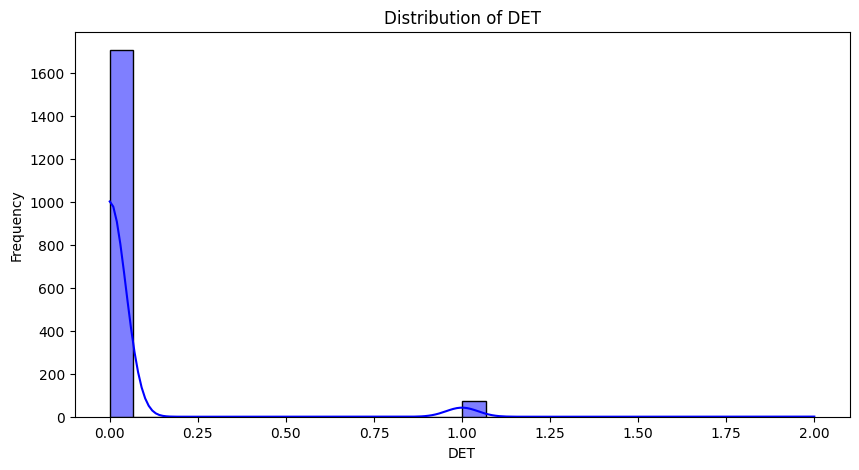

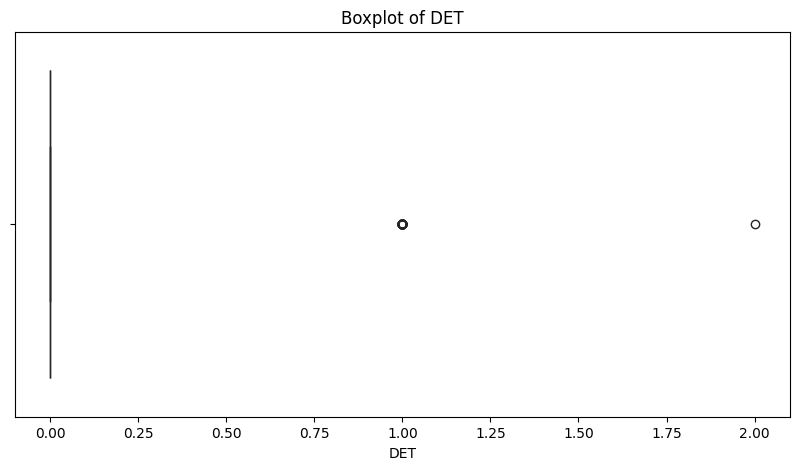

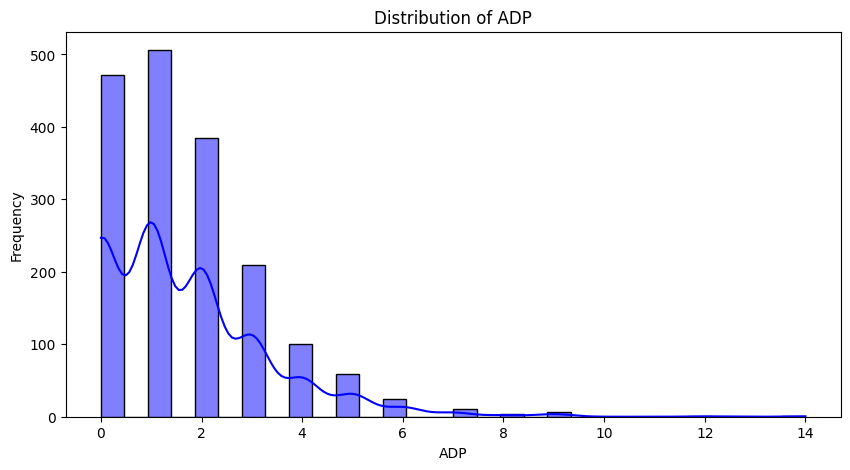

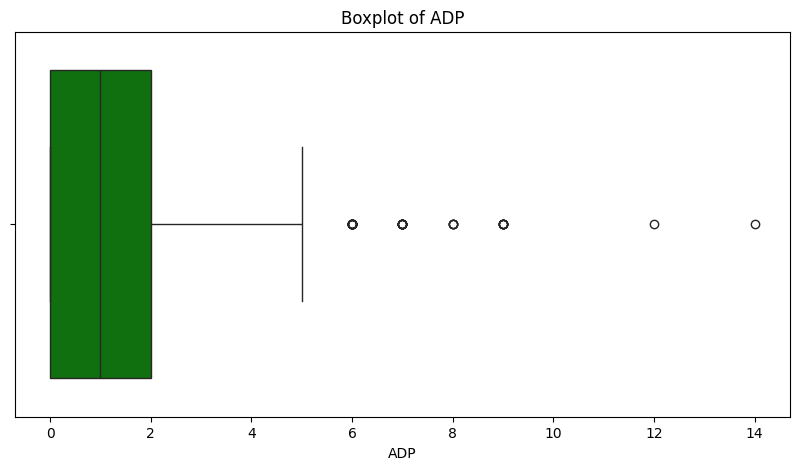

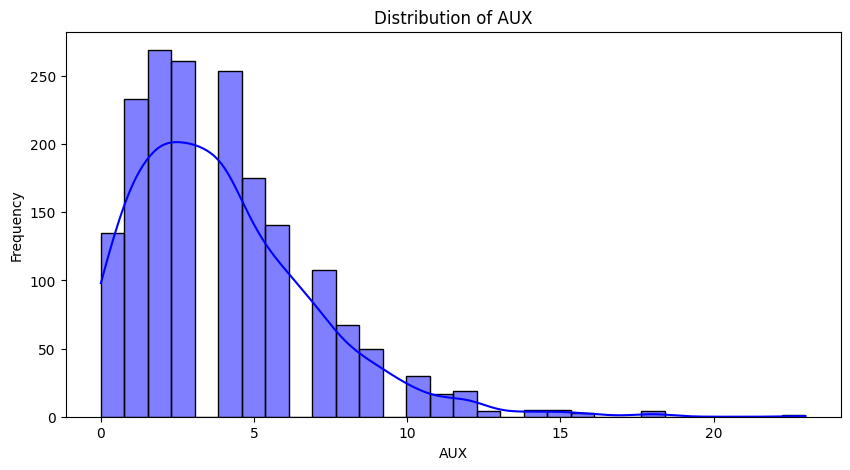

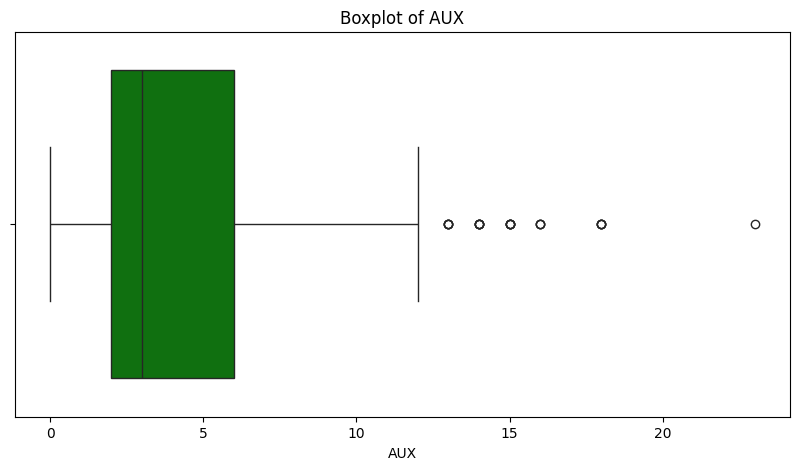

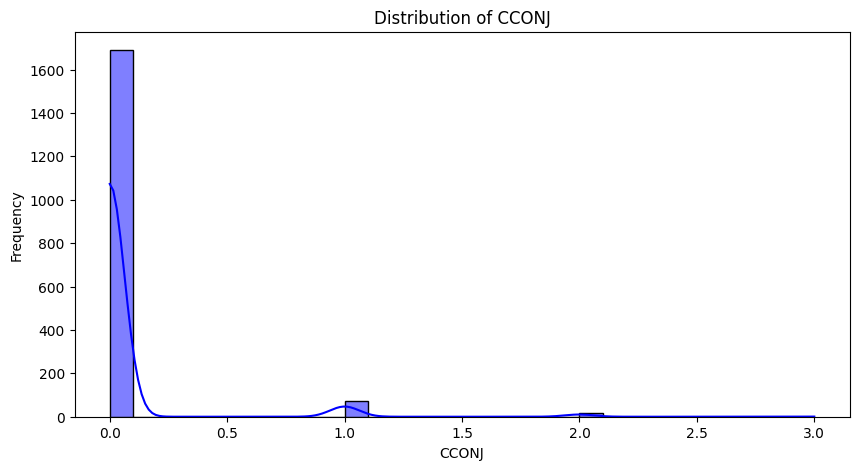

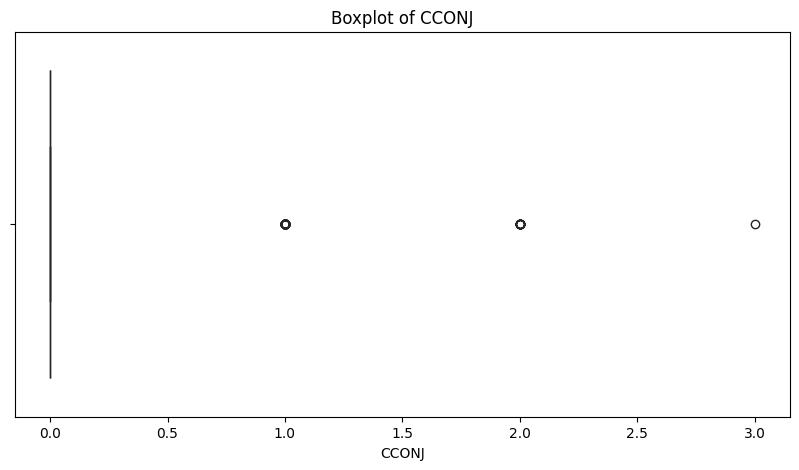

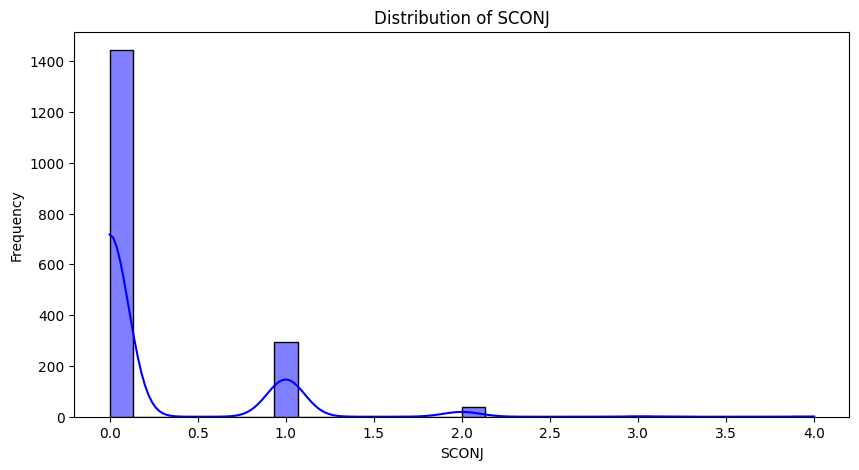

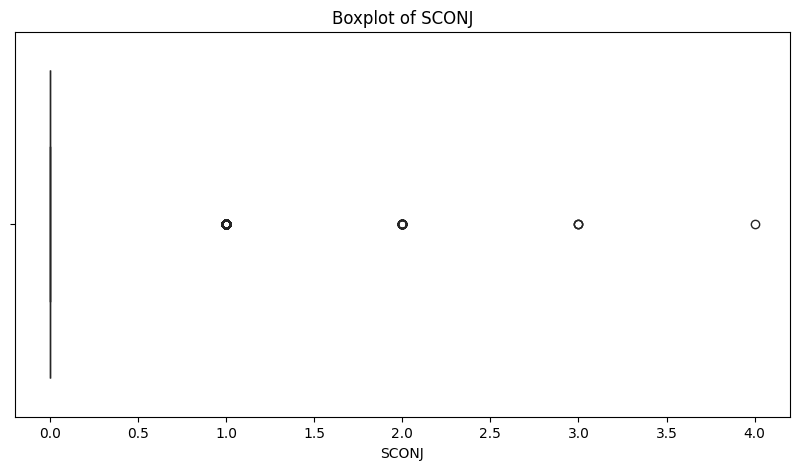

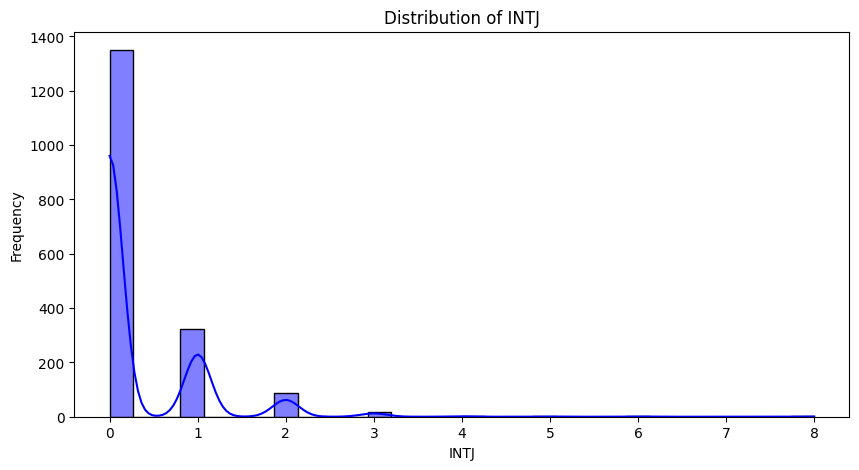

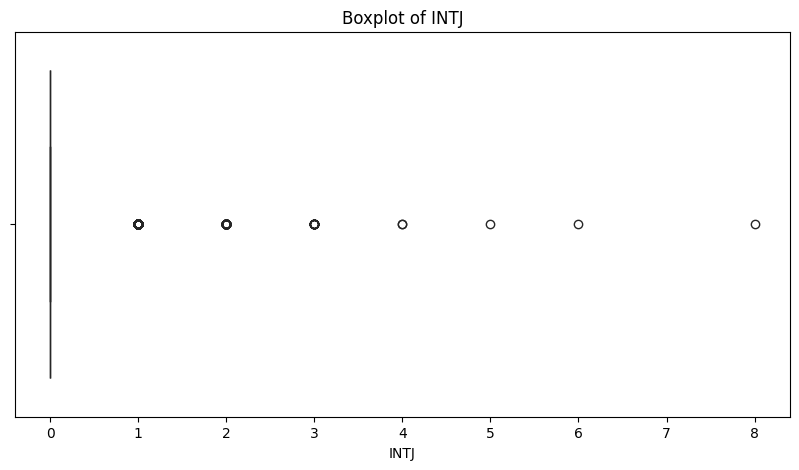

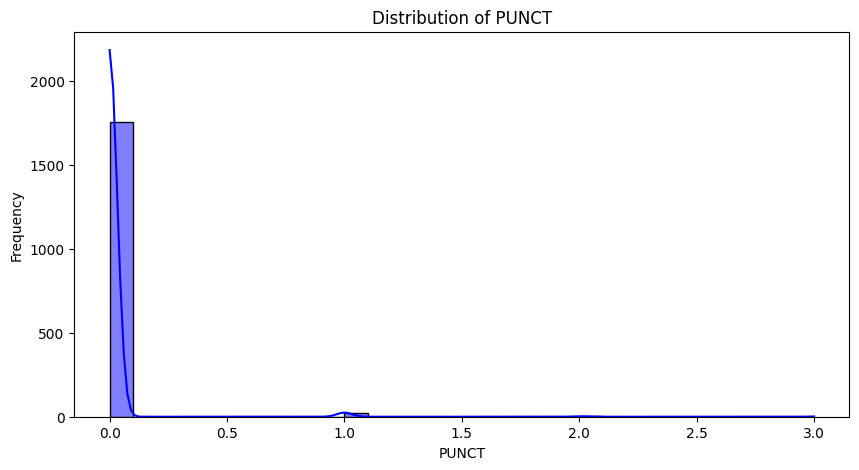

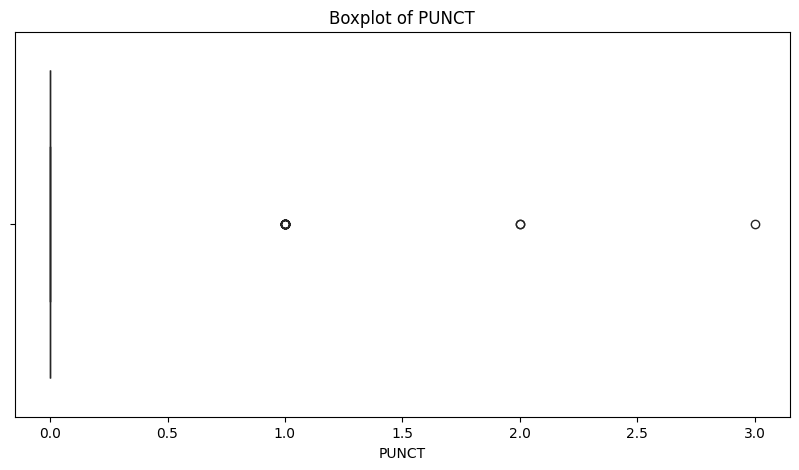

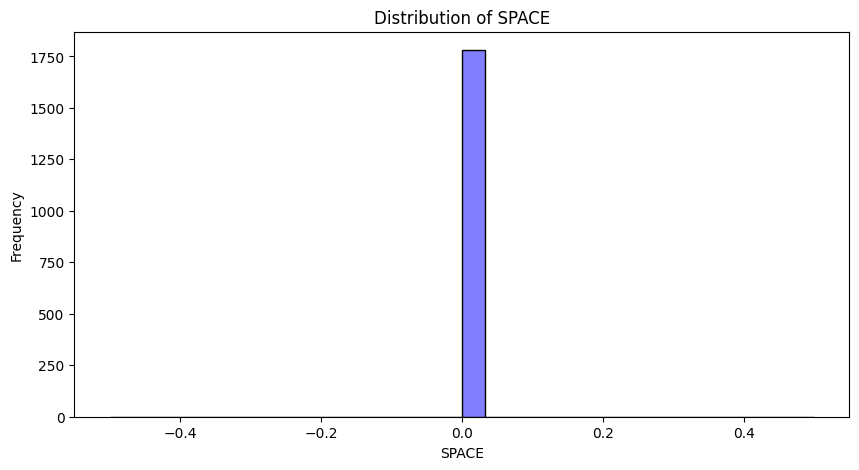

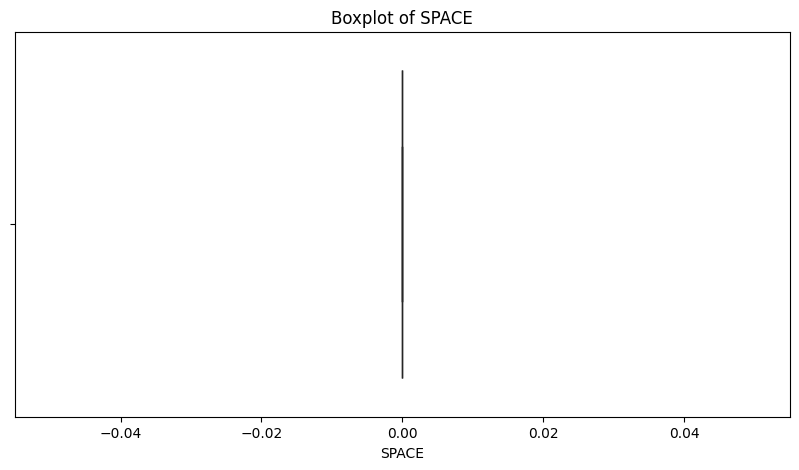

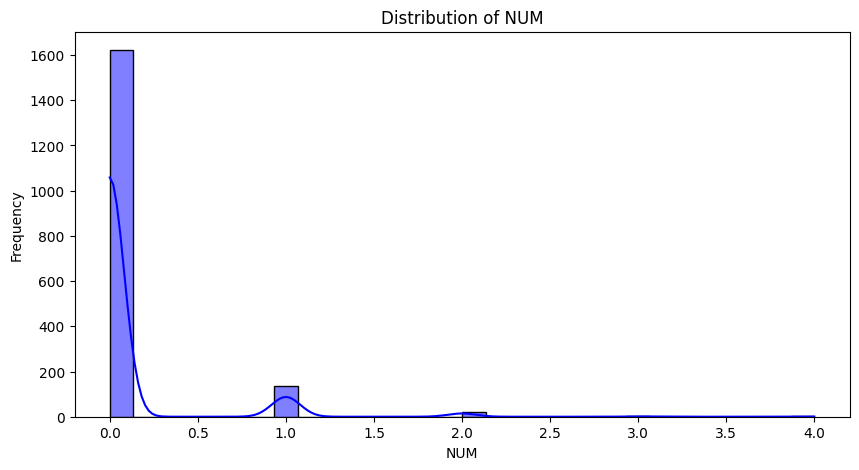

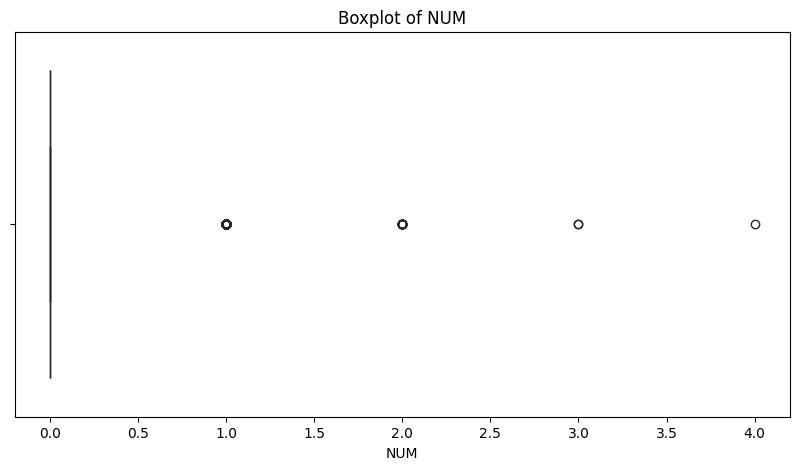

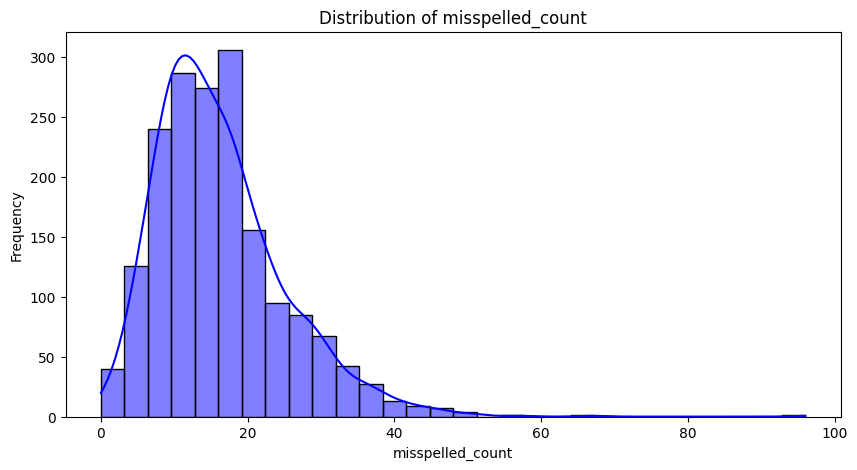

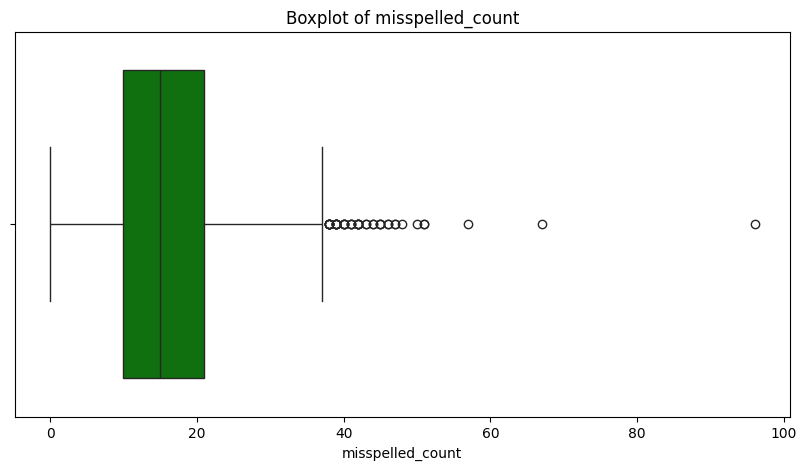

In [30]:
numerical_columns = df.select_dtypes(include=['number']).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col], color='green')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()